<a id='1'></a>
# <p style="background-color:violet; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 10px 25px;">Importing necessary modules and libraries📚</p>

In [ ]:
pip install transformers nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 64.9 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline


# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re,string,unicodedata
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string

import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
nltk.download('punkt')
stopwords = nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

pd.set_option('display.max_colwidth', 100)

# model save & load
import pickle

import tensorflow as tf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Project 5800/Dataset_Abusive_Non-Abusive.csv',nrows=1500)

In [ ]:
def showBar(trump, musk, title):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  height = [trump, musk]
  bars = ('Trump - ' + str(trump), 'Musk - ' + str(musk))
  x_pos = np.arange(len(bars))
  plt.title(title)
  plt.bar(x_pos, height, color=[ 'red', 'blue'])
  plt.xticks(x_pos, bars)
  plt.show()

In [ ]:
def saveModel(model, modelName):
  pickle.dump(model, open(modelName + '.sav', 'wb'))

In [ ]:
def loadModel(modelName):
  return pickle.load(open(modelName + '.sav', 'rb'))

In [ ]:
exclude = set(",.:;'’\"-?_!/()´`%@#&$*")
def removePunctuation(txt):
   return ''.join([(c if c not in exclude else " ") for c in txt])
    
def removeNumbers(txt):
    return ''.join(c for c in txt if not c.isnumeric())

def removeStopwords(txt):
    return ' '.join(w for w in word_tokenize(txt) if not w.lower() in stop_words)



::Let's remove numbers first and assign cleaned data to new column.


In [ ]:

train_df['cleaned'] = train_df['tweet'].apply(lambda x: removePunctuation(x))
train_df['cleaned'] = train_df['cleaned'].apply(lambda x: removeNumbers(x))
train_df['cleaned'] = train_df['cleaned'].apply(lambda x: removeStopwords(x))
train_df['cleaned'] = train_df['cleaned'].apply(lambda x: removePunctuation(x))



X_train, y_train = train_df['cleaned'], train_df['Abusive']
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
X_train = vectoriser.transform(X_train)

Okay, we can see now punctuations have been removed from the comments. As a second step, let's remove numbers and assign cleaned data to new column.


In [ ]:
train_df['cleaned'] = train_df['cleaned'].apply(lambda x: removeNumbers(x))
train_df.head(10)

,Abusive,Non_Abusive,tweet,cleaned
0,0,1,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,RT mayasolovely woman complain cleaning house amp man always take trash
1,1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,RT mleew boy dats cold tyga dwn bad cuffin dat hoe st place
2,1,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,RT UrKindOfBrand Dawg RT sbabylife ever fuck bitch start cry confused shit
3,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,RT C G Anderson viva based look like tranny
4,1,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...,RT ShenikaRoberts shit hear might true might faker bitch told ya
5,1,0,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for some...",Madison x shit blows claim faithful somebody still fucking hoes
6,1,0,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit g...",BrighterDays sit HATE another bitch got much shit going
7,1,0,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,selfiequeenbri cause tired big bitches coming us skinny girls
8,1,0,""" &amp; you might not get ya bitch back &amp; thats that """,amp might get ya bitch back amp thats
9,1,0,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",rhythmixx hobbies include fighting Mariam bitch


Removing Stop Words


In [ ]:
nltk.download('punkt')
stopwords = nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re,string,unicodedata
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string

import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.pipeline import Pipeline

<a id="#"></a>
    
<font size="+2" color="indigo"><b>BERT</b></font><br>


In [ ]:
# Name of the BERT model to use
model_name = 'bert-base-uncased'

# Max length of tokens
max_length = 40

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
#config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
bert = TFAutoModel.from_pretrained(model_name)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32') 
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
x = bert.bert(inputs)


In [ ]:
x

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<KerasTensor: shape=(None, 40, 768) dtype=float32 (created by layer 'bert')>, pooler_output=<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'bert')>, past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None)

In [ ]:
train_df.cleaned[4]

'RT ShenikaRoberts shit hear might true might faker bitch told ya'

In [ ]:
df_la = pd.get_dummies(train_df, columns = ['Abusive'])
df_la

,Non_Abusive,tweet,cleaned,Abusive_0,Abusive_1
0,1,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,RT mayasolovely woman complain cleaning house amp man always take trash,1,0
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,RT mleew boy dats cold tyga dwn bad cuffin dat hoe st place,0,1
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,RT UrKindOfBrand Dawg RT sbabylife ever fuck bitch start cry confused shit,0,1
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,RT C G Anderson viva based look like tranny,0,1
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...,RT ShenikaRoberts shit hear might true might faker bitch told ya,0,1
...,...,...,...,...,...
1495,0,&#8220;@RudeBoi_Drew: I'm finna eat some pussy&#8221; lmao,RudeBoi Drew finna eat pussy lmao,0,1
1496,1,&#8220;@RudeNation21: When girls take my snap backs and beanies lol&#128169; that's 35 dollars a...,RudeNation girls take snap backs beanies lol dollars hat AX beanieS let take,1,0
1497,0,&#8220;@RudePost: A new breed of white girl... https://t.co/0Zsu3zQiXD&#8221; she slammed that b...,RudePost new breed white girl https co ZsuzQiXD slammed bitch,0,1
1498,0,&#8220;@Runyacheckup: &#8220;@Shane_A1: A Bitch Couldn't pay me to get dem pregnant again &#1285...,Runyacheckup Shane Bitch pay get dem pregnant fr fam ion see niccas poppin kids,0,1


In [ ]:
train_sentences = train_df["cleaned"].values
list_classes = ['Abusive_0','Abusive_1']
train_y = df_la[list_classes].values

In [ ]:
#x2 =Dense(512, activation='relu')(x[1])
x2 = GlobalAveragePooling1D()(x[0])
#x3 = Dropout(0.5)(x2)
y =Dense(len(list_classes), activation='sigmoid', name='outputs')(x2)

model = Model(inputs=inputs, outputs=y)
#model.layers[2].trainable = False

# Take a look at the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 40)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 40)]         0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['attention_mask[0][0]',         
                                thPoolingAndCrossAt               'input_ids[0][0]']              
                                tentions(last_hidde                                               
                                n_state=(None, 40,                                          

In [ ]:
optimizer = Adam(lr=1e-5)
model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [ ]:
# Tokenize the input 
x = tokenizer(
    text=list(train_sentences),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    #x={'input_ids': x['input_ids']},
    y={'outputs': train_y},
    validation_split=0.1,
    #batch_size=45,
    epochs=3)

Epoch 1/3


43/43 [==============================] - 86s 444ms/step - loss: 0.6100 - accuracy: 0.7815 - val_loss: 0.2985 - val_accuracy: 0.9133
Epoch 2/3
43/43 [==============================] - 14s 328ms/step - loss: 0.4497 - accuracy: 0.8363 - val_loss: 0.3190 - val_accuracy: 0.9133
Epoch 3/3
43/43 [==============================] - 14s 329ms/step - loss: 0.4491 - accuracy: 0.8363 - val_loss: 0.3069 - val_accuracy: 0.9133


In [ ]:
saveModel(bert, 'bert')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...bert
......embeddings
.........LayerNorm
............vars
...............0
...............1
.........dropout
............vars
.........vars
............0
............1
............2
......encoder
.........layer
............tf_bert_layer
...............attention
..................dense_output
.....................LayerNorm
........................vars
...........................0
...........................1
.....................dense
........................vars
...........................0
...........................1
.....................dropout
........................vars
.....................vars
..................self_attention
.....................dropout
........................vars
.....................key
........................vars
...........................0
...........................1
.....................query
........................vars
...........................0
...........................1
.....

# RoBERTa

In [ ]:
from transformers import AutoTokenizer, RobertaForCausalLM, AutoConfig
from transformers import RobertaConfig, RobertaModel

In [ ]:
# Name of the BERT model to use
model_name = 'roberta-base'

# Max length of tokens
max_length = 40

# Load transformers config and set output_hidden_states to False
#config = BertConfig.from_pretrained(model_name)
configuration = RobertaConfig()
#config.output_hidden_states = False
model = RobertaModel(configuration)
configuration = model.config
# Load BERT tokenizer
#tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
roberta = TFAutoModel.from_pretrained(model_name)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32') 
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
x = roberta.roberta(inputs)

In [ ]:
x

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<KerasTensor: shape=(None, 40, 768) dtype=float32 (created by layer 'roberta')>, pooler_output=<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'roberta')>, past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None)

In [ ]:
train_df.cleaned[4]

'RT ShenikaRoberts shit hear might true might faker bitch told ya'

In [ ]:
df_la = pd.get_dummies(train_df, columns = ['Abusive'])
df_la

,Non_Abusive,tweet,cleaned,Abusive_0,Abusive_1
0,1,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,RT mayasolovely woman complain cleaning house amp man always take trash,1,0
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,RT mleew boy dats cold tyga dwn bad cuffin dat hoe st place,0,1
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,RT UrKindOfBrand Dawg RT sbabylife ever fuck bitch start cry confused shit,0,1
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,RT C G Anderson viva based look like tranny,0,1
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...,RT ShenikaRoberts shit hear might true might faker bitch told ya,0,1
...,...,...,...,...,...
1495,0,&#8220;@RudeBoi_Drew: I'm finna eat some pussy&#8221; lmao,RudeBoi Drew finna eat pussy lmao,0,1
1496,1,&#8220;@RudeNation21: When girls take my snap backs and beanies lol&#128169; that's 35 dollars a...,RudeNation girls take snap backs beanies lol dollars hat AX beanieS let take,1,0
1497,0,&#8220;@RudePost: A new breed of white girl... https://t.co/0Zsu3zQiXD&#8221; she slammed that b...,RudePost new breed white girl https co ZsuzQiXD slammed bitch,0,1
1498,0,&#8220;@Runyacheckup: &#8220;@Shane_A1: A Bitch Couldn't pay me to get dem pregnant again &#1285...,Runyacheckup Shane Bitch pay get dem pregnant fr fam ion see niccas poppin kids,0,1


In [ ]:
train_sentences = train_df["cleaned"].values
list_classes = ['Abusive_0','Abusive_1']
train_y = df_la[list_classes].values

In [ ]:
x2 =Dense(512, activation='relu')(x[1])
#x2 = GlobalAveragePooling1D()([0])
#x3 = Dropout(0.5)(x2)
y =Dense(len(list_classes), activation='sigmoid', name='outputs')(x2)

model = Model(inputs=inputs, outputs=y)
#model.layers[2].trainable = False

# Take a look at the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 40)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 40)]         0           []                               
                                                                                                  
 roberta (TFRobertaMainLayer)   TFBaseModelOutputWi  124645632   ['attention_mask[0][0]',         
                                thPoolingAndCrossAt               'input_ids[0][0]']              
                                tentions(last_hidde                                               
                                n_state=(None, 40,                                          

In [ ]:

optimizer = Adam(learning_rate=0.001, weight_decay=None)
model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [ ]:
x = tokenizer(
    text=list(train_sentences),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    #x={'input_ids': x['input_ids']},
    y={'outputs': train_y},
    validation_split=0.1,
    #batch_size=45,
    epochs=3)

Epoch 1/3
43/43 [==============================] - 64s 457ms/step - loss: 0.5103 - accuracy: 0.8304 - val_loss: 0.3155 - val_accuracy: 0.9133
Epoch 2/3
43/43 [==============================] - 14s 327ms/step - loss: 0.4552 - accuracy: 0.8363 - val_loss: 0.3214 - val_accuracy: 0.9133
Epoch 3/3
43/43 [==============================] - 14s 318ms/step - loss: 0.4595 - accuracy: 0.8363 - val_loss: 0.2955 - val_accuracy: 0.9133


In [ ]:
saveModel(roberta, 'roberta')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......tf_roberta_main_layer
.........embeddings
............LayerNorm
...............vars
..................0
..................1
............dropout
...............vars
............vars
...............0
...............1
...............2
.........encoder
............layer
...............tf_roberta_layer
..................attention
.....................dense_output
........................LayerNorm
...........................vars
..............................0
..............................1
........................dense
...........................vars
..............................0
..............................1
........................dropout
...........................vars
........................vars
.....................self_attention
........................dropout
...........................vars
........................key
...........................vars
..............................0
................

DisitlBERT

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

from transformers import DistilBertConfig, DistilBertModel

In [ ]:
# Name of the BERT model to use
model_name = 'distilbert-base-uncased'

# Max length of tokens
max_length = 40

# Load transformers config and set output_hidden_states to False
#config = BertConfig.from_pretrained(model_name)
configuration = DistilBertConfig()
#config.output_hidden_states = False
model = DistilBertModel(configuration)
configuration = model.config
# Load BERT tokenizer
#tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
distilbert= TFAutoModel.from_pretrained(model_name)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32') 
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
x = distilbert.distilbert(inputs)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
x

TFBaseModelOutput(last_hidden_state=<KerasTensor: shape=(None, 40, 768) dtype=float32 (created by layer 'distilbert')>, hidden_states=None, attentions=None)

In [ ]:
df_la = pd.get_dummies(train_df, columns = ['Abusive'])
df_la

,Non_Abusive,tweet,cleaned,Abusive_0,Abusive_1
0,1,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,RT mayasolovely woman complain cleaning house amp man always take trash,1,0
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,RT mleew boy dats cold tyga dwn bad cuffin dat hoe st place,0,1
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,RT UrKindOfBrand Dawg RT sbabylife ever fuck bitch start cry confused shit,0,1
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,RT C G Anderson viva based look like tranny,0,1
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...,RT ShenikaRoberts shit hear might true might faker bitch told ya,0,1
...,...,...,...,...,...
1495,0,&#8220;@RudeBoi_Drew: I'm finna eat some pussy&#8221; lmao,RudeBoi Drew finna eat pussy lmao,0,1
1496,1,&#8220;@RudeNation21: When girls take my snap backs and beanies lol&#128169; that's 35 dollars a...,RudeNation girls take snap backs beanies lol dollars hat AX beanieS let take,1,0
1497,0,&#8220;@RudePost: A new breed of white girl... https://t.co/0Zsu3zQiXD&#8221; she slammed that b...,RudePost new breed white girl https co ZsuzQiXD slammed bitch,0,1
1498,0,&#8220;@Runyacheckup: &#8220;@Shane_A1: A Bitch Couldn't pay me to get dem pregnant again &#1285...,Runyacheckup Shane Bitch pay get dem pregnant fr fam ion see niccas poppin kids,0,1


In [ ]:
train_sentences = train_df["cleaned"].values
list_classes = ['Abusive_0','Abusive_1']
train_y = df_la[list_classes].values

In [ ]:
#x2 =Dense(512, activation='relu')(x[0])
x2 = GlobalAveragePooling1D()(x[0])
#x3 = Dropout(0.5)(x2)
y =Dense(len(list_classes), activation='sigmoid', name='outputs')(x2)


model = Model(inputs=inputs, outputs=y)
#model.layers[2].trainable = False

# Take a look at the model
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 40)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 40)]         0           []                               
                                                                                                  
 distilbert (TFDistilBertMainLa  TFBaseModelOutput(l  66362880   ['attention_mask[0][0]',         
 yer)                           ast_hidden_state=(N               'input_ids[0][0]']              
                                one, 40, 768),                                                    
                                 hidden_states=None                                         

In [ ]:

optimizer = Adam(learning_rate=0.001, weight_decay=None)
model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [ ]:
x = tokenizer(
    text=list(train_sentences),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    #x={'input_ids': x['input_ids']},
    y={'outputs': train_y},
    validation_split=0.1,
    #batch_size=45,
    epochs=3)

Epoch 1/3
43/43 [==============================] - 33s 255ms/step - loss: 0.7454 - accuracy: 0.7970 - val_loss: 0.4189 - val_accuracy: 0.9133
Epoch 2/3
43/43 [==============================] - 8s 179ms/step - loss: 0.4588 - accuracy: 0.8363 - val_loss: 0.3320 - val_accuracy: 0.9133
Epoch 3/3
43/43 [==============================] - 8s 186ms/step - loss: 0.4503 - accuracy: 0.8363 - val_loss: 0.2958 - val_accuracy: 0.9133


In [ ]:
saveModel(distilbert, 'distilbert')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...distilbert
......embeddings
.........LayerNorm
............vars
...............0
...............1
.........dropout
............vars
.........vars
............0
............1
......transformer
.........layer
............tf_transformer_block
...............attention
..................dropout
.....................vars
..................k_lin
.....................vars
........................0
........................1
..................out_lin
.....................vars
........................0
........................1
..................q_lin
.....................vars
........................0
........................1
..................v_lin
.....................vars
........................0
........................1
..................vars
...............dropout
..................vars
...............ffn
..................dropout
.....................vars
..................lin1
.....................vars
...............


<a id="#"></a>
    
<font size="+2" color="indigo"><b>Applying Machine Learning Algorithms</b></font><br>

<a id="#"></a>
    
<font size="+2" color="indigo"><b>Decision Tree Classifier</b></font><br>

In [ ]:
from sklearn.metrics import roc_curve, auc
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)

saveModel(dtc, 'dtc')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>Logistic Regression</b></font><br>

In [ ]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

saveModel(lr, 'lr')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>KNeighbors Clssifier</b></font><br>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

saveModel(knn, 'knn')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>AdaBoost Classifier</b></font><br>

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

saveModel(abc, 'abc')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>MultiNomial NB</b></font><br>

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

saveModel(mnb, 'mnb')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>Gradient Boosting Classifier</b></font><br>

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

saveModel(gbc, 'gbc')

<a id="#"></a>
    
<font size="+2" color="indigo"><b>Random Forest Clssifier</b></font><br>

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(random_state=42)
rfc.fit(X_train, y_train)

saveModel(rfc, 'rfc')

# Save All Models

In [ ]:
saveModel(dtc, 'dtc')
saveModel(lr, 'lr')
saveModel(knn, 'knn')
saveModel(abc, 'abc')
saveModel(mnb, 'mnb')
saveModel(gbc, 'gbc')
saveModel(rfc, 'rfc')


# Final Prediction

In [ ]:
pred_musk_df = pd.read_csv('/content/drive/MyDrive/Project 5800/Elon Musk.csv',nrows =1500 )
pred_musk_df['cleaned'] = pred_musk_df['tweet'].apply(lambda x: removePunctuation(x))
pred_musk_df['cleaned'] = pred_musk_df['cleaned'].apply(lambda x: removeNumbers(x))
pred_musk_df['cleaned'] = pred_musk_df['cleaned'].apply(lambda x: removeStopwords(x))
pred_musk_df['cleaned'] = pred_musk_df['cleaned'].apply(lambda x: removePunctuation(x))
pred_musk_X_test  = vectoriser.transform(pred_musk_df['cleaned'])

In [ ]:
pred_trump_df = pd.read_csv('/content/drive/MyDrive/Project 5800/Donald Trump.csv',nrows = 1500 )
pred_trump_df['cleaned'] = pred_trump_df['tweet'].apply(lambda x: removePunctuation(x))
pred_trump_df['cleaned'] = pred_trump_df['cleaned'].apply(lambda x: removeNumbers(x))
pred_trump_df['cleaned'] = pred_trump_df['cleaned'].apply(lambda x: removeStopwords(x))
pred_trump_df['cleaned'] = pred_trump_df['cleaned'].apply(lambda x: removePunctuation(x))

pred_trump_X_test  = vectoriser.transform(pred_trump_df['cleaned'])

In [ ]:
pred_musk_df.cleaned[1]

'elonmusk Twitter Spaces eventually endend encrypted security protection communications snooping Furthermore plan private Spaces among individuals group individuals ETA twitterspaces elon elonmusk freespeech'

In [ ]:
def predictAndVisualize(musk_dataset, trump_dataset, model, title):
  col_name = title+'Abusive'
  musk_prediction = model.predict(musk_dataset)
  trump_prediction = model.predict(trump_dataset)
  pred_trump_df[col_name]= trump_prediction
  pred_musk_df[col_name]= musk_prediction
  musk_abusive = np.count_nonzero(trump_prediction==1)
  trump_abusive = np.count_nonzero(musk_prediction==1) 
  musk_non_abusive = np.count_nonzero(trump_prediction==0)
  trump_non_abusive = np.count_nonzero(musk_prediction==0)
  title1 = title+'Abusive'
  title2 = title+'Non_Abusive'
  showBar(trump_abusive, musk_abusive, title1)
  showBar(trump_non_abusive,musk_non_abusive,title2)


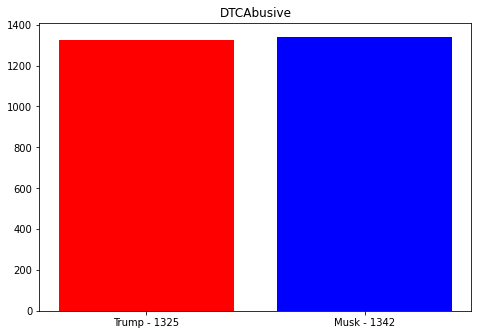

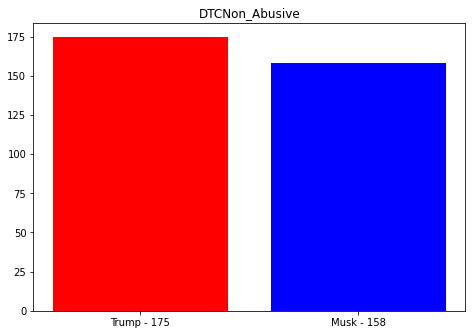

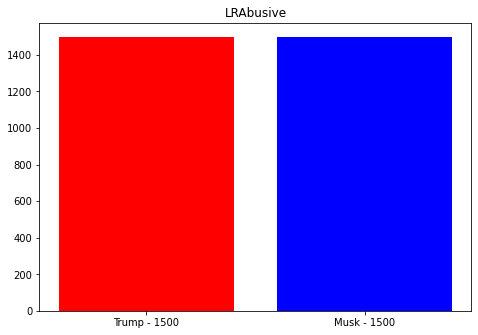

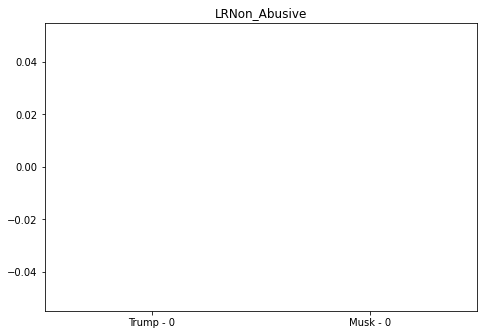

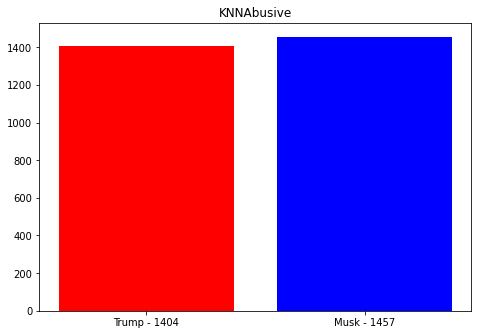

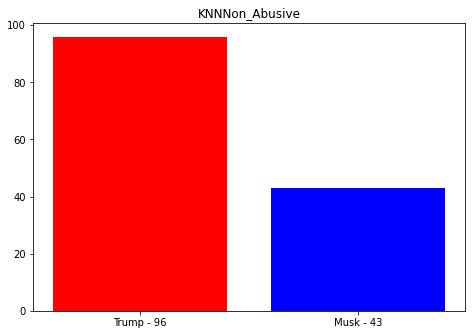

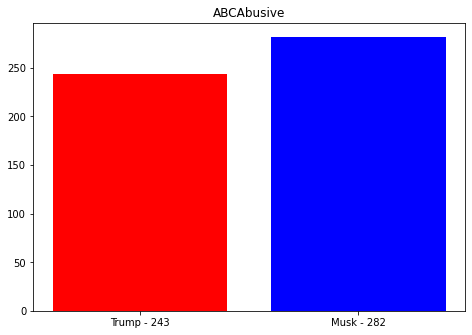

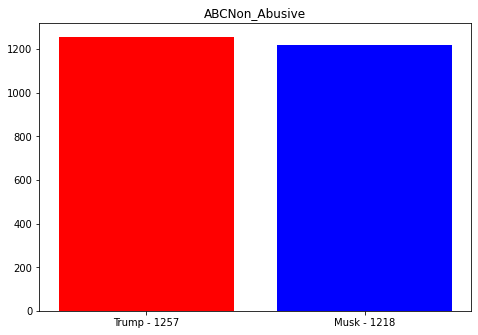

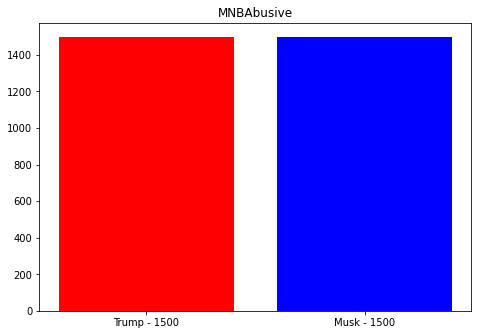

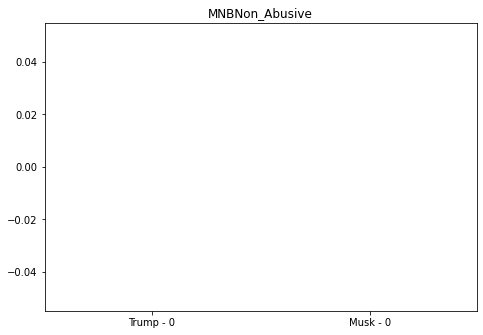

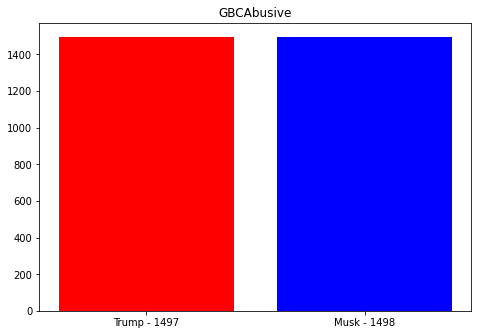

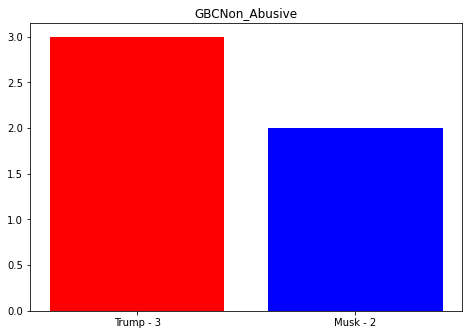

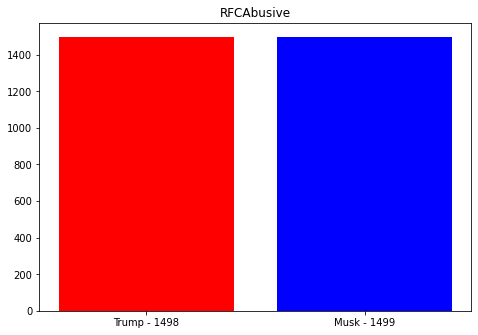

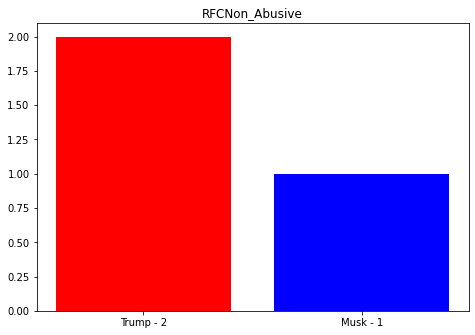

In [ ]:
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('dtc'),'DTC') 
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('lr'), 'LR')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('knn'), 'KNN')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('abc'), 'ABC')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('mnb'), 'MNB')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('gbc'), 'GBC')
predictAndVisualize(pred_musk_X_test,pred_trump_X_test, loadModel('rfc'), 'RFC')



In [ ]:

pred_musk_df.head()

,tweet,cleaned,DTCAbusive,LRAbusive,KNNAbusive,ABCAbusive,MNBAbusive,GBCAbusive,RFCAbusive
0,How can anyone take Elon Musk seriously when he speaks with such incredibly cringeworthy languag...,anyone take Elon Musk seriously speaks incredibly cringeworthy language People respect fortune f...,1,1,1,1,1,1,1
1,".@elonmusk \n\nIs, or will #Twitter #Spaces eventually be end2end encrypted for security and for...",elonmusk Twitter Spaces eventually endend encrypted security protection communications snooping ...,1,1,1,0,1,1,1
2,So I was locked out of my account for unusual activity. Had to verify my phone number .Nope I’ve...,locked account unusual activity verify phone number Nope threaten one spammed anyone tweet lot a...,1,1,1,0,1,1,1
3,A tour do @MCRashid com o “álbum novo na quinta” me fez rir demais. Não dá! Hahahahaha\nElon Mus...,tour MCRashid com “ álbum novo na quinta ” fez rir demais Não dá Hahahahaha Elon Musk fdp hahahha,1,1,1,0,1,1,1
4,Elon Musk we still have some trolls messing with system.,Elon Musk still trolls messing system,1,1,1,0,1,1,1


# Accuracy Precision and Recall

In [ ]:


import numpy as np
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
pred_musk_df

,tweet,cleaned,DTCAbusive,LRAbusive,KNNAbusive,ABCAbusive,MNBAbusive,GBCAbusive,RFCAbusive
0,How can anyone take Elon Musk seriously when he speaks with such incredibly cringeworthy languag...,anyone take Elon Musk seriously speaks incredibly cringeworthy language People respect fortune f...,1,1,1,1,1,1,1
1,".@elonmusk \n\nIs, or will #Twitter #Spaces eventually be end2end encrypted for security and for...",elonmusk Twitter Spaces eventually endend encrypted security protection communications snooping ...,1,1,1,0,1,1,1
2,So I was locked out of my account for unusual activity. Had to verify my phone number .Nope I’ve...,locked account unusual activity verify phone number Nope threaten one spammed anyone tweet lot a...,1,1,1,0,1,1,1
3,A tour do @MCRashid com o “álbum novo na quinta” me fez rir demais. Não dá! Hahahahaha\nElon Mus...,tour MCRashid com “ álbum novo na quinta ” fez rir demais Não dá Hahahahaha Elon Musk fdp hahahha,1,1,1,0,1,1,1
4,Elon Musk we still have some trolls messing with system.,Elon Musk still trolls messing system,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...
1495,"No lie, I would trust James Cameron with taking us to Mars before I trusted Elon Musk. (Cameron ...",lie would trust James Cameron taking us Mars trusted Elon Musk Cameron would probably film movie...,0,1,1,0,1,1,1
1496,I’m so happy that Elon Musk is taking charge of Twitter. It’s going to be great!!!,happy Elon Musk taking charge Twitter going great,1,1,1,0,1,1,1
1497,Hey @elonmusk I have an idea for you. Make a splinter branch of Twitter called Safe Space and al...,Hey elonmusk idea Make splinter branch Twitter called Safe Space allow users complete control al...,1,1,1,0,1,1,1
1498,"One of every 4 tweets is now a lame, low budget, badly personalized ad. Guess this is how Twitte...",One every tweets lame low budget badly personalized ad Guess Twitter announces ran money elonmusk,1,1,1,0,1,1,1


In [ ]:
pred_musk_X_test

<1500x16871 sparse matrix of type '<class 'numpy.float64'>'
	with 10151 stored elements in Compressed Sparse Row format>

In [ ]:
print(classification_report(y_train, pred_musk_df.DTCAbusive))
print(confusion_matrix(y_train, pred_musk_df.LRAbusive))

DTC_f1 = round(f1_score(y_train, pred_musk_df.DTCAbusive, average='weighted'), 3)
DTC_accuracy = round((accuracy_score(y_train, pred_musk_df.DTCAbusive)*100),2)

print("Accuracy : " , DTC_accuracy , " %")
print("f1_score : " , DTC_f1)

              precision    recall  f1-score   support

           0       0.15      0.12      0.13       234
           1       0.84      0.88      0.86      1266

    accuracy                           0.76      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.74      0.76      0.75      1500

[[   0  234]
 [   0 1266]]
Accuracy :  76.33  %
f1_score :  0.749


In [ ]:
print(classification_report(y_train, pred_musk_df.LRAbusive))
print(confusion_matrix(y_train, pred_musk_df.LRAbusive))

LR_f1 = round(f1_score(y_train, pred_musk_df.LRAbusive, average='weighted'), 3)
LR_accuracy = round((accuracy_score(y_train, pred_musk_df.LRAbusive)*100),2)

print("Accuracy : " , LR_accuracy , " %")
print("f1_score : " , LR_f1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.84      1.00      0.92      1266

    accuracy                           0.84      1500
   macro avg       0.42      0.50      0.46      1500
weighted avg       0.71      0.84      0.77      1500

[[   0  234]
 [   0 1266]]
Accuracy :  84.4  %
f1_score :  0.773


In [ ]:
print(classification_report(y_train, pred_musk_df.KNNAbusive))
print(confusion_matrix(y_train, pred_musk_df.KNNAbusive))

KNN_f1 = round(f1_score(y_train, pred_musk_df.KNNAbusive, average='weighted'), 3)
KNN_accuracy = round((accuracy_score(y_train, pred_musk_df.KNNAbusive)*100),2)

print("Accuracy : " , KNN_accuracy , " %")
print("f1_score : " , KNN_f1)

              precision    recall  f1-score   support

           0       0.10      0.04      0.06       234
           1       0.84      0.93      0.88      1266

    accuracy                           0.79      1500
   macro avg       0.47      0.49      0.47      1500
weighted avg       0.73      0.79      0.76      1500

[[  10  224]
 [  86 1180]]
Accuracy :  79.33  %
f1_score :  0.755


In [ ]:
print(classification_report(y_train, pred_musk_df.ABCAbusive))
print(confusion_matrix(y_train, pred_musk_df.ABCAbusive))

ABC_f1 = round(f1_score(y_train, pred_musk_df.ABCAbusive, average='weighted'), 3)
ABC_accuracy = round((accuracy_score(y_train, pred_musk_df.ABCAbusive)*100),2)

print("Accuracy : " , ABC_accuracy , " %")
print("f1_score : " , ABC_f1)

              precision    recall  f1-score   support

           0       0.15      0.80      0.75       234
           1       0.81      0.16      0.76      1266

    accuracy                           0.76      1500
   macro avg       0.48      0.48      0.76      1500
weighted avg       0.71      0.26      0.76      1500

[[ 188   46]
 [1069  197]]
Accuracy :  75.67  %
f1_score :  0.76


In [ ]:
print(classification_report(y_train, pred_musk_df.MNBAbusive))
print(confusion_matrix(y_train, pred_musk_df.MNBAbusive))

MNB_f1 = round(f1_score(y_train, pred_musk_df.MNBAbusive, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_train, pred_musk_df.MNBAbusive)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.84      1.00      0.92      1266

    accuracy                           0.84      1500
   macro avg       0.42      0.50      0.46      1500
weighted avg       0.71      0.84      0.77      1500

[[   0  234]
 [   0 1266]]
Accuracy :  84.4  %
f1_score :  0.773


In [ ]:
print(classification_report(y_train, pred_musk_df.GBCAbusive))
print(confusion_matrix(y_train, pred_musk_df.GBCAbusive))

GBC_f1 = round(f1_score(y_train, pred_musk_df.GBCAbusive, average='weighted'), 3)
GBC_accuracy = round((accuracy_score(y_train, pred_musk_df.GBCAbusive)*100),2)

print("Accuracy : " , GBC_accuracy , " %")
print("f1_score : " , GBC_f1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.84      1.00      0.91      1266

    accuracy                           0.84      1500
   macro avg       0.42      0.50      0.46      1500
weighted avg       0.71      0.84      0.77      1500

[[   0  234]
 [   3 1263]]
Accuracy :  84.2  %
f1_score :  0.772


In [ ]:
print(classification_report(y_train, pred_musk_df.RFCAbusive))
print(confusion_matrix(y_train, pred_musk_df.RFCAbusive))

RFC_f1 = round(f1_score(y_train, pred_musk_df.RFCAbusive, average='weighted'), 3)
RFC_accuracy = round((accuracy_score(y_train, pred_musk_df.RFCAbusive)*100),2)

print("Accuracy : " , RFC_accuracy , " %")
print("f1_score : " , RFC_f1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.84      1.00      0.91      1266

    accuracy                           0.84      1500
   macro avg       0.42      0.50      0.46      1500
weighted avg       0.71      0.84      0.77      1500

[[   0  234]
 [   2 1264]]
Accuracy :  84.27  %
f1_score :  0.772
